# Q5: Quantum Machine Learning

Machine Learning has significantly benefited from Convolutional Neural Networks (CNNs), which extract spatial features from image data using convolutional and pooling layers. However, as quantum computing progresses, researchers have started exploring quantum analogs of CNNs that leverage quantum circuits to perform convolution-like operations.



## Q5 (a): Quantum Convolution

In this problem, you will explore the quantum approach of using Quantum Convolution to image classification of MNIST Dataset. Quantum Convolution uses small quantum circuits to extract quantum-enhanced features from classical image data before feeding them into a classical neural network.

Reference: [Quanvolutional Neural Networks: Powering
Image Recognition with Quantum Circuits](https://arxiv.org/abs/1904.04767).

Credits: Borrowed the setup and training by [Andrea Mari](https://pennylane.ai/profile/amari) on [Quanvolutional Neural Networks](https://pennylane.ai/qml/demos/tutorial_quanvolution)

In [ ]:
!pip install 'tensorflow[and-cuda]'

import tensorflow as tf
epochs = 40          # Number of optimization epochs
random_layers = 1    # Number of random layers
train_samples = 500        # Size of the train dataset
test_samples = 100         # Size of the test dataset

FOLDER_PATH = ""            # Add the folder path to save the data
np.random.seed(0)
tf.random.set_seed(0)




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.3/363.3 MB 30.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 33.3 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.5/22.5 MB 38.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 31.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 895.7/895.7 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.2/577.2 MB 21.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.5/192.5 MB 34.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 39.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.3/130.3 MB 43.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.6/217.6 MB 41.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 40.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━

2025-03-07 19:03:41.340783: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741395821.352566  816556 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741395821.356454  816556 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-07 19:03:41.371418: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Load MNIST dataset and normalize the images. Use train_samples for training and test_samples for testing. The tutorial on [Quanvolutional Neural Networks](https://pennylane.ai/qml/demos/tutorial_quanvolution) will aid you for 5(a).

In [ ]:
## Load MNIST Dataset
#  Use reduced dataset with train_samples for training and test_samples for testing

(train_images_full, train_labels_full), (test_images_full, test_labels_full) = tf.keras.datasets.mnist.load_data()

shuffled_train_indices = np.random.permutation(train_images_full.shape[0])
train_images = train_images_full[shuffled_train_indices][:train_samples]
train_labels = train_labels_full[shuffled_train_indices][:train_samples]

shuffled_test_indices = np.random.permutation(test_images_full.shape[0])
test_images = test_images_full[shuffled_test_indices][:test_samples]
test_labels = test_labels_full[shuffled_test_indices][:test_samples]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


We implement quantum convolution kernel using quantum circuit. The circuit consists of, layer of local $R_{y}$ rotations (angles scaled by a factor of $\pi$), then a random circuit and finally a measurement in the computation basis, estimating the expectation values.

For this implementation we use a system of 4 qubits.

In [ ]:
## Circuit for quantum convolution
#  Takes input as angles for the R_Y layer

n_wires = 4
dev = qml.device("default.mixed", wires=n_wires)
# Random circuit parameters

np.random.seed(0)
rand_params = np.random.uniform(0, 2*np.pi, size=(random_layers, n_wires))

@qml.qnode(dev)
def circuit(angles):
    # Entangling Layer of Ry
    for i in range(n_wires):
        qml.RY(angles[i] * np.pi, wires=i)
    # Random quantum circuit (Check RandomLayers in pennylane)
    qml.RandomLayers(
        weights=rand_params,
        wires=range(n_wires),
        seed=0,  # Fixed seed for gate pattern reproducibility
        rotations=[qml.RX, qml.RY, qml.RZ],  # Default rotations
        ratio_imprim=0.3  # 30% entanglement density
    )
    # Final measurement estimating expectation values as 4 classical outputs
    return [qml.expval(qml.PauliZ(i)) for i in range(n_wires)]



In the next function, we divide the image into 2x2 squares and apply the above quantum circuit to perform quantum convolution.

In [ ]:
def quanvolve(image):
    """Convolves the input image with many applications of the same quantum circuit."""
    height, width = image.shape
    out_height = height // 2
    out_width = width // 2
    out = np.zeros((out_height, out_width, 4))


    # Loop over the coordinates of the image in 2X2 squares
    # Process each 2x2 region of the image with the above quantum circuit
    for i in range(0, height, 2):
        for j in range(0, width, 2):
            patch = image[i:i+2, j:j+2]
            
            normalized_patch = patch.astype(np.float32) / 255.0
            angles = normalized_patch.flatten() * np.pi  
            
            expectations = circuit(angles)
            
            out[i//2, j//2, :] = expectations
    return out

In [ ]:
## Quantum pre-processing of train and test images
#  Do not modify the following code

quanvolve_train_images = np.array([quanvolve(image) for image in train_images])
quanvolve_test_images = np.array([quanvolve(image) for image in test_images])


In [ ]:
## ML model and training
#  Do not modify the following code
from tensorflow import keras

def BaseModel():
    model = keras.models.Sequential([
        keras.layers.Flatten(),
        keras.layers.Dense(10, activation="softmax")
    ])

    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

quanvolve_model = BaseModel()

quanvolve_history = quanvolve_model.fit(
    quanvolve_train_images.reshape(-1,28,28,1),
    train_labels,
    validation_data=(quanvolve_test_images.reshape(-1,28,28,1), test_labels),
    batch_size=4,
    epochs=epochs,
    verbose=2,
)

Epoch 1/40


I0000 00:00:1741402906.407507  816556 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2687 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6
I0000 00:00:1741402906.804346 1311084 service.cc:148] XLA service 0x7da00c0079a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741402906.804371 1311084 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2025-03-07 21:01:46.815419: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1741402906.853413 1311084 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1741402907.300965 1311084 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


125/125 - 1s - 10ms/step - accuracy: 0.4140 - loss: 1.8047 - val_accuracy: 0.6300 - val_loss: 1.2305
Epoch 2/40
125/125 - 0s - 2ms/step - accuracy: 0.7700 - loss: 0.8674 - val_accuracy: 0.7600 - val_loss: 0.9186
Epoch 3/40
125/125 - 0s - 2ms/step - accuracy: 0.8420 - loss: 0.6008 - val_accuracy: 0.7600 - val_loss: 0.8000
Epoch 4/40
125/125 - 0s - 2ms/step - accuracy: 0.8760 - loss: 0.4651 - val_accuracy: 0.7800 - val_loss: 0.7424
Epoch 5/40
125/125 - 0s - 2ms/step - accuracy: 0.9140 - loss: 0.3765 - val_accuracy: 0.7800 - val_loss: 0.7135
Epoch 6/40
125/125 - 0s - 2ms/step - accuracy: 0.9360 - loss: 0.3118 - val_accuracy: 0.8000 - val_loss: 0.6980
Epoch 7/40
125/125 - 0s - 2ms/step - accuracy: 0.9500 - loss: 0.2620 - val_accuracy: 0.7800 - val_loss: 0.6883
Epoch 8/40
125/125 - 0s - 2ms/step - accuracy: 0.9660 - loss: 0.2224 - val_accuracy: 0.7900 - val_loss: 0.6811
Epoch 9/40
125/125 - 0s - 2ms/step - accuracy: 0.9720 - loss: 0.1903 - val_accuracy: 0.8000 - val_loss: 0.6749
Epoch 10/40

In [ ]:
## Classical model

classical_model = BaseModel()

classical_history = classical_model.fit(
    train_images,
    train_labels,
    validation_data=(test_images, test_labels),
    batch_size=4,
    epochs=epochs,
    verbose=2,
)

Epoch 1/40
125/125 - 1s - 9ms/step - accuracy: 0.4340 - loss: 61.4738 - val_accuracy: 0.7300 - val_loss: 22.7534
Epoch 2/40
125/125 - 0s - 2ms/step - accuracy: 0.7360 - loss: 16.5845 - val_accuracy: 0.7400 - val_loss: 22.6001
Epoch 3/40
125/125 - 0s - 2ms/step - accuracy: 0.8220 - loss: 8.3610 - val_accuracy: 0.7500 - val_loss: 20.1137
Epoch 4/40
125/125 - 0s - 2ms/step - accuracy: 0.8800 - loss: 4.8070 - val_accuracy: 0.7800 - val_loss: 18.1405
Epoch 5/40
125/125 - 0s - 2ms/step - accuracy: 0.9100 - loss: 2.9131 - val_accuracy: 0.7800 - val_loss: 16.3946
Epoch 6/40
125/125 - 0s - 2ms/step - accuracy: 0.9560 - loss: 0.8206 - val_accuracy: 0.7800 - val_loss: 16.6560
Epoch 7/40
125/125 - 0s - 2ms/step - accuracy: 0.9400 - loss: 1.4119 - val_accuracy: 0.8200 - val_loss: 14.7073
Epoch 8/40
125/125 - 0s - 2ms/step - accuracy: 0.9620 - loss: 0.7830 - val_accuracy: 0.8300 - val_loss: 14.2977
Epoch 9/40
125/125 - 0s - 2ms/step - accuracy: 0.9180 - loss: 2.2311 - val_accuracy: 0.7700 - val_loss

Compare the performance of Quanvolve vs Classical models based on accuracy.

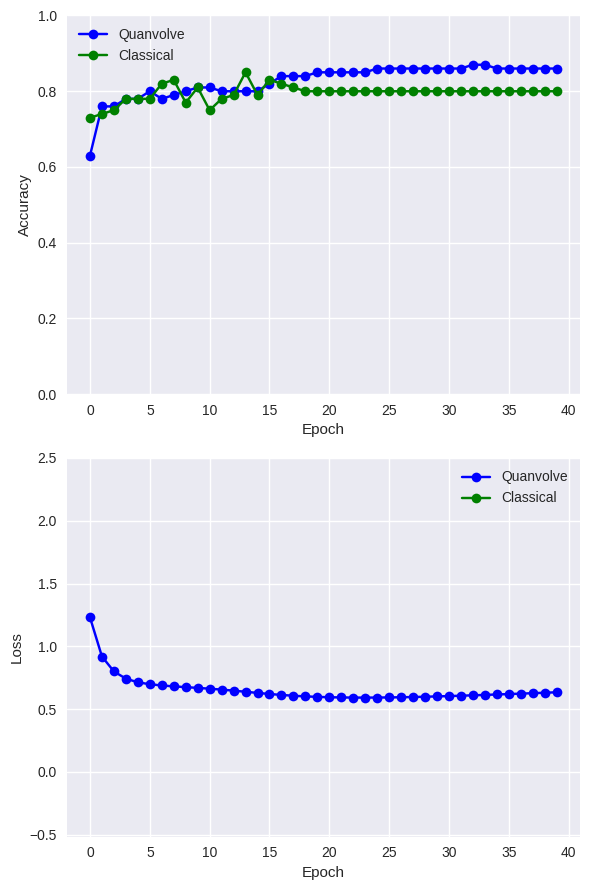

In [ ]:
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 9))

ax1.plot(quanvolve_history.history["val_accuracy"], "-ob", label="Quanvolve")
ax1.plot(classical_history.history["val_accuracy"], "-og", label="Classical")
ax1.set_ylabel("Accuracy")
ax1.set_ylim([0, 1])
ax1.set_xlabel("Epoch")
ax1.legend()

ax2.plot(quanvolve_history.history["val_loss"], "-ob", label="Quanvolve")
ax2.plot(classical_history.history["val_loss"], "-og", label="Classical")
ax2.set_ylabel("Loss")
ax2.set_ylim(top=2.5)
ax2.set_xlabel("Epoch")
ax2.legend()
plt.tight_layout()
plt.show()

## Q5 (b) Impact of gate noise

In the quantum circuit in the function `circuit`, add depolarizing noise to the $R_{Y}$ gates using pennylane `DepolarizingChannel` varying the error probability from 0 to 1 in steps of 1/4. Explain the impact of noise on accuracy.

In [ ]:
@qml.qnode(dev)
def noisy_circuit(angles, p):

    for i in range(n_wires):
        qml.RY(angles[i] * np.pi, wires=i)
        qml.DepolarizingChannel(p, wires=i)  
    
    qml.RandomLayers(
        weights=rand_params,
        wires=range(n_wires),
        seed=0,
        rotations=[qml.RX, qml.RY, qml.RZ],
        ratio_imprim=0.3
    )
    
    return [qml.expval(qml.PauliZ(i)) for i in range(n_wires)]

p_values = np.linspace(0, 1, 5)

def noisy_quanvolve(image, p):
    """Convolves the input image with many applications of the same quantum circuit."""
    height, width = image.shape
    out_height = height // 2
    out_width = width // 2
    out = np.zeros((out_height, out_width, 4))


    # Loop over the coordinates of the image in 2X2 squares
    # Process each 2x2 region of the image with the above quantum circuit
    for i in range(0, height, 2):
        for j in range(0, width, 2):
            patch = image[i:i+2, j:j+2]
            
            normalized_patch = patch.astype(np.float32) / 255.0
            angles = normalized_patch.flatten() * np.pi  
            
            expectations = noisy_circuit(angles, p)
            
            out[i//2, j//2, :] = expectations
    return out
result = []
for p in p_values:    
    print(f"Deal with error rate={p}")
    print("Preprocessing images")
    quanvolve_train_images = np.array([noisy_quanvolve(image, p) for image in train_images])
    quanvolve_test_images = np.array([noisy_quanvolve(image, p) for image in test_images])
    quanvolve_model = BaseModel()
    print("Start to Train")
    quanvolve_history = quanvolve_model.fit(
        quanvolve_train_images.reshape(-1,28,28,1),
        train_labels,
        validation_data=(quanvolve_test_images.reshape(-1,28,28,1), test_labels),
        batch_size=4,
        epochs=epochs,
        verbose=2,
    )
    result.append(quanvolve_history.history["val_accuracy"])


Deal with error rate=0.0
Preprocessing images
Start to Train
Epoch 1/40
125/125 - 1s - 6ms/step - accuracy: 0.4640 - loss: 1.6644 - val_accuracy: 0.5800 - val_loss: 1.1857
Epoch 2/40
125/125 - 0s - 2ms/step - accuracy: 0.7660 - loss: 0.8360 - val_accuracy: 0.7300 - val_loss: 0.8988
Epoch 3/40
125/125 - 0s - 2ms/step - accuracy: 0.8380 - loss: 0.5809 - val_accuracy: 0.7600 - val_loss: 0.7767
Epoch 4/40
125/125 - 0s - 2ms/step - accuracy: 0.8860 - loss: 0.4472 - val_accuracy: 0.8200 - val_loss: 0.7189
Epoch 5/40
125/125 - 0s - 2ms/step - accuracy: 0.9200 - loss: 0.3601 - val_accuracy: 0.8200 - val_loss: 0.6905
Epoch 6/40
125/125 - 0s - 2ms/step - accuracy: 0.9420 - loss: 0.2973 - val_accuracy: 0.8200 - val_loss: 0.6750
Epoch 7/40
125/125 - 0s - 2ms/step - accuracy: 0.9500 - loss: 0.2495 - val_accuracy: 0.8200 - val_loss: 0.6652
Epoch 8/40
125/125 - 0s - 2ms/step - accuracy: 0.9640 - loss: 0.2116 - val_accuracy: 0.8100 - val_loss: 0.6577
Epoch 9/40
125/125 - 0s - 2ms/step - accuracy: 0.97

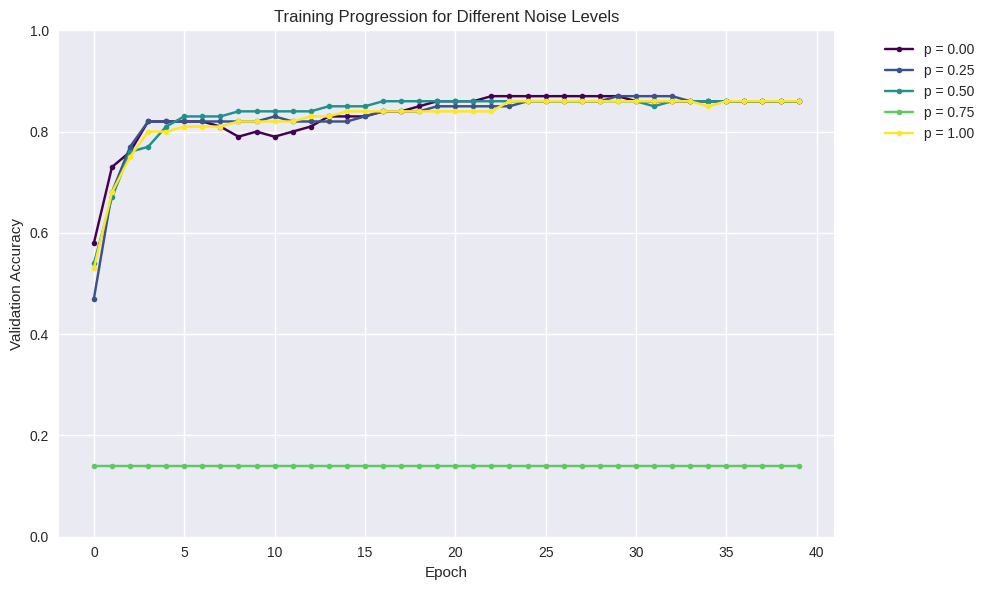

In [ ]:
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(p_values)))

for i, (p, acc_history) in enumerate(zip(p_values, result)):
    plt.plot(acc_history, 
             color=colors[i],
             linestyle='-',
             marker='o',
             markersize=4,
             label=f'p = {p:.2f}')

plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Training Progression for Different Noise Levels')
plt.ylim(0, 1)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Depolarizing noise severely impacts quantum model accuracy, with performance degrading exponentially as p increases. Especially when p=0.75.

## Q5 (c)

Instead of the `BaseModel` described above use the `CNNModel` given below and plot the variation of accuracy with epochs for Quanvolve and Classical similar to Q5(a). Comment on the impact of Quantum Kernel for this case.

Epoch 1/40
125/125 - 2s - 14ms/step - accuracy: 0.4320 - loss: 1.8381 - val_accuracy: 0.5500 - val_loss: 1.2776
Epoch 2/40
125/125 - 0s - 2ms/step - accuracy: 0.7760 - loss: 0.7575 - val_accuracy: 0.7700 - val_loss: 0.7617
Epoch 3/40
125/125 - 0s - 2ms/step - accuracy: 0.8560 - loss: 0.4554 - val_accuracy: 0.8100 - val_loss: 0.6566
Epoch 4/40
125/125 - 0s - 2ms/step - accuracy: 0.9020 - loss: 0.3211 - val_accuracy: 0.8100 - val_loss: 0.6530
Epoch 5/40
125/125 - 0s - 2ms/step - accuracy: 0.9400 - loss: 0.2338 - val_accuracy: 0.8200 - val_loss: 0.6723
Epoch 6/40
125/125 - 0s - 2ms/step - accuracy: 0.9600 - loss: 0.1733 - val_accuracy: 0.8000 - val_loss: 0.6912
Epoch 7/40
125/125 - 0s - 2ms/step - accuracy: 0.9720 - loss: 0.1290 - val_accuracy: 0.7900 - val_loss: 0.7042
Epoch 8/40
125/125 - 0s - 2ms/step - accuracy: 0.9840 - loss: 0.0946 - val_accuracy: 0.7900 - val_loss: 0.7042
Epoch 9/40
125/125 - 0s - 2ms/step - accuracy: 0.9940 - loss: 0.0675 - val_accuracy: 0.7800 - val_loss: 0.6925


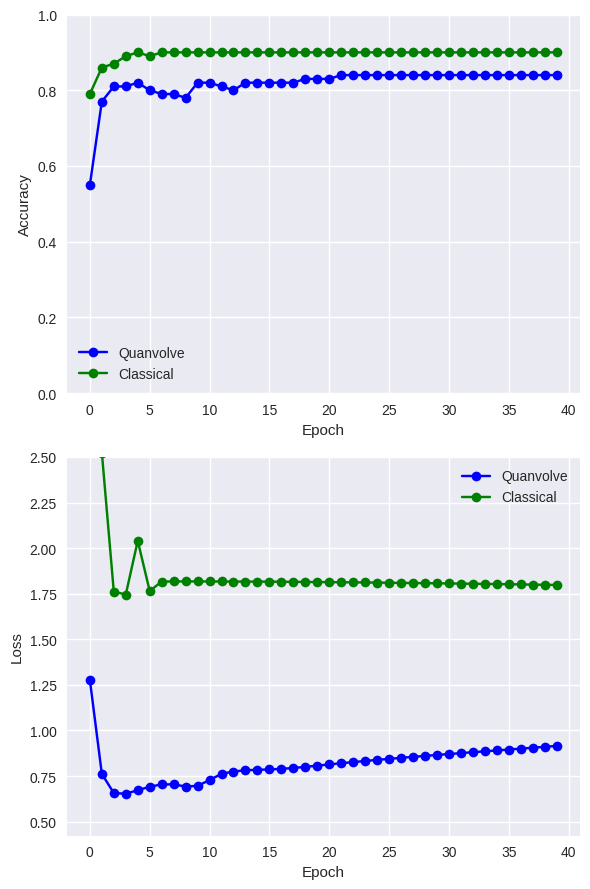

In [ ]:
from tensorflow.keras import layers
input_shape = (28, 28, 1)
def CNNModel():
    model = keras.models.Sequential([
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(10, activation="softmax"),
    ])

    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

quanvolve_model = CNNModel()

quanvolve_history = quanvolve_model.fit(
    quanvolve_train_images.reshape(-1,28,28,1),
    train_labels,
    validation_data=(quanvolve_test_images.reshape(-1,28,28,1), test_labels),
    batch_size=4,
    epochs=epochs,
    verbose=2,
)

classical_model = CNNModel()

classical_history = classical_model.fit(
    train_images,
    train_labels,
    validation_data=(test_images, test_labels),
    batch_size=4,
    epochs=epochs,
    verbose=2,
)

plt.style.use("seaborn-v0_8")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 9))

ax1.plot(quanvolve_history.history["val_accuracy"], "-ob", label="Quanvolve")
ax1.plot(classical_history.history["val_accuracy"], "-og", label="Classical")
ax1.set_ylabel("Accuracy")
ax1.set_ylim([0, 1])
ax1.set_xlabel("Epoch")
ax1.legend()

ax2.plot(quanvolve_history.history["val_loss"], "-ob", label="Quanvolve")
ax2.plot(classical_history.history["val_loss"], "-og", label="Classical")
ax2.set_ylabel("Loss")
ax2.set_ylim(top=2.5)
ax2.set_xlabel("Epoch")
ax2.legend()
plt.tight_layout()
plt.show()

Quantum Kernel slightly decreases the accuracy of result but decreases the loss significantly.